In [1]:
%pylab inline
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.dummy as dummy
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
original_data = pd.read_csv(
    "heritage_data.csv",
    header=0,
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")

original_data.tail()

,﻿MemberID_t,YEAR_t,Suppressed Claims,DaysInHospital,trainset,age_05,age_15,age_25,age_35,age_45,...,Max Drug Count,Min Drug Count,Average Drug Count,Drug Months,Max Lab Count,Min Lab Count,Average Lab Count,Lab Months,No Lab Count,No Drug Count
218409,16622402,Y2,0,0,1,0,0,0,0,1,...,4,3,3.181818,11,9,1,5.0,2,0,0
218410,16622477,Y2,0,0,1,0,0,0,0,0,...,1,1,1.000000,2,0,0,0.0,0,1,0
218411,16674403,Y2,0,0,1,0,0,0,0,0,...,2,1,1.200000,5,4,1,2.5,2,0,0
218412,16819725,Y2,0,0,1,0,0,0,0,1,...,3,1,1.714285,7,6,6,6.0,1,0,0
218413,16942180,Y2,1,0,1,0,0,0,0,1,...,2,1,1.222222,9,9,1,3.2,10,0,0


In [3]:
cols = original_data.columns.tolist()
cols[0] = 'MemberID_t'

original_data.columns = cols
original_data.tail()

,MemberID_t,YEAR_t,Suppressed Claims,DaysInHospital,trainset,age_05,age_15,age_25,age_35,age_45,...,Max Drug Count,Min Drug Count,Average Drug Count,Drug Months,Max Lab Count,Min Lab Count,Average Lab Count,Lab Months,No Lab Count,No Drug Count
218409,16622402,Y2,0,0,1,0,0,0,0,1,...,4,3,3.181818,11,9,1,5.0,2,0,0
218410,16622477,Y2,0,0,1,0,0,0,0,0,...,1,1,1.000000,2,0,0,0.0,0,1,0
218411,16674403,Y2,0,0,1,0,0,0,0,0,...,2,1,1.200000,5,4,1,2.5,2,0,0
218412,16819725,Y2,0,0,1,0,0,0,0,1,...,3,1,1.714285,7,6,6,6.0,1,0,0
218413,16942180,Y2,1,0,1,0,0,0,0,1,...,2,1,1.222222,9,9,1,3.2,10,0,0


In [50]:
RANDOM_SEED = 0

# Binary CLASSIFICATION or continuous REGRESSION
TYPE = "REGRESSION"

data = original_data.copy()

data = data[data['sexMISS'] == 0]
data = data[data['age_MISS'] == 0]
data = data.drop(['sexMISS', 'age_MISS'], axis=1)

if TYPE == "CLASSIFICATION":
    data['DaysInHospital'] = data['DaysInHospital'].map(lambda x: min(x,1))
    data['age_01-30'] = data['age_05'] + data['age_15'] + data['age_25']
    data['age_31-60'] = data['age_35'] + data['age_45'] + data['age_55']
    data['age_61-99'] = data['age_65'] + data['age_75'] + data['age_85']
else:
    ages = [5, 15, 25, 35, 45, 55, 65, 75, 85]
    data['Age'] = map(lambda l: ages[l.index(1)], zip(data['age_05'], data['age_15'], data['age_25'], 
                                                      data['age_35'], data['age_45'], data['age_55'], 
                                                      data['age_65'], data['age_75'], data['age_85']))

data = data.drop(['age_05', 'age_15', 'age_25', 'age_35', 'age_45', 'age_55', 'age_65', 'age_75', 'age_85'], axis=1)
data = data[data['trainset'] == 1]
data = data.reset_index(drop=True)

del data['MemberID_t']
del data['YEAR_t']
del data['trainset']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data[data.columns.difference(['DaysInHospital'])], data['DaysInHospital'], train_size=0.25, random_state=RANDOM_SEED)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print len(X_train), len(X_test)
X_train.tail()

28785 86358


,Age,Average Charlson Index,Average Days Since First Service,Average Drug Count,Average Lab Count,Average Length Of Stay,Average Payment Delay,Condition AMI,Condition APPCHOL,Condition ARTHSPIN,...,Treatment Code SIS,Treatment Code SMCD,Treatment Code SMS,Treatment Code SNS,Treatment Code SO,Treatment Code SRS,Treatment Code SUS,Unknown Length Of Stay,sexFEMALE,sexMALE
21243,45,0,2,1.5,4,0,27,0,0,0,...,0,0,0,0,0,0,0,7,1,0
45891,65,0,1,0.0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,1,1,0
42613,35,2,1,0.0,10,0,27,0,0,0,...,0,0,0,0,0,0,0,3,0,1
43567,55,1,7,0.0,10,1,65,0,0,0,...,0,0,0,0,0,0,0,5,1,0
68268,75,1,1,1.0,8,0,53,0,0,0,...,0,0,0,0,0,0,0,6,0,1


In [51]:
def obj_func(y_test, y_pred):
    temp = np.log1p(y_test) - np.log1p(y_pred)
    return np.sqrt(np.mean(np.square(temp)))

In [52]:
GBM_NTREES = 500
GBM_SHRINKAGE = 0.05
GBM_DEPTH = 4
GBM_MINOBS = 50

p_h = (1.0*sum(y_train))/len(y_train)
ratio = (1-p_h)/p_h

if TYPE == "CLASSIFICATION":
    print 'proportion of hospitalized users: {:.2f}%'.format(100*p_h)
    sample_weight = map(lambda x: 4 if x==1 else 1, y_train)
    
    cls_dummy = dummy.DummyClassifier(strategy='stratified')
    cls_dummy.fit(X_train, y_train, sample_weight=sample_weight)
    y_pred_dummy = cls_dummy.predict(X_test)
    
    print "Dummy Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, y_pred_dummy))
    print "Dummy F1: {:.2f}".format(metrics.f1_score(y_test, y_pred_dummy))
    
    cls = ensemble.GradientBoostingClassifier(n_estimators=GBM_NTREES, learning_rate=GBM_SHRINKAGE, max_depth=GBM_DEPTH, min_samples_leaf=GBM_MINOBS, verbose=1)
    cls.fit(X_train, y_train, sample_weight=sample_weight)
    y_pred = cls.predict(X_test)
    print "Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, y_pred))
    print "F1: {:.2f}".format(metrics.f1_score(y_test, y_pred))
else:
    reg_y_train = np.log1p(y_train.copy())
    reg_y_test = y_test.copy()
    cls = ensemble.GradientBoostingRegressor(n_estimators=GBM_NTREES, learning_rate=GBM_SHRINKAGE, max_depth=GBM_DEPTH, min_samples_leaf=GBM_MINOBS, verbose=1)
    cls.fit(X_train, reg_y_train)
    reg_y_pred = map(lambda x: min(max(np.expm1(x),0),15), cls.predict(X_test))
    
    print 'Average time in hospital: {:.2f}'.format(np.mean(reg_y_test))
    print 'Average error: {:.2f}'.format(np.mean(abs(reg_y_test-reg_y_pred)))
    print 'Log RMSE: {:.2f}'.format(obj_func(reg_y_test, reg_y_pred))
    print 'Dummy RMSE: {:.2f}'.format(obj_func(reg_y_test, np.zeros(len(reg_y_test))))
    
    y_pred = map(lambda x: 1 if x > 0.5 else 0, reg_y_pred)
    y_test = reg_y_test.map(lambda x: 1 if x > 0.5 else 0)
    print "Binary Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, y_pred))
    print "Binary F1: {:.2f}".format(metrics.f1_score(y_test, y_pred))
    print "Dummy Binary Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, np.zeros(len(y_test))))
    print "Dummy Binary F1: {:.2f}".format(metrics.f1_score(y_test, np.zeros(len(y_test))))

      Iter       Train Loss   Remaining Time 
         1           0.1711            3.29m
         2           0.1697            2.59m
         3           0.1684            2.36m
         4           0.1672            2.25m
         5           0.1661            2.16m
         6           0.1651            2.13m
         7           0.1642            2.07m
         8           0.1634            2.04m
         9           0.1627            2.01m
        10           0.1620            1.99m
        20           0.1572            1.85m
        30           0.1540            1.80m
        40           0.1518            1.78m
        50           0.1504            1.68m
        60           0.1493            1.58m
        70           0.1484            1.51m
        80           0.1477            1.44m
        90           0.1470            1.39m
       100           0.1463            1.35m
       200           0.1408           56.45s
       300           0.1371           37.73s
       40

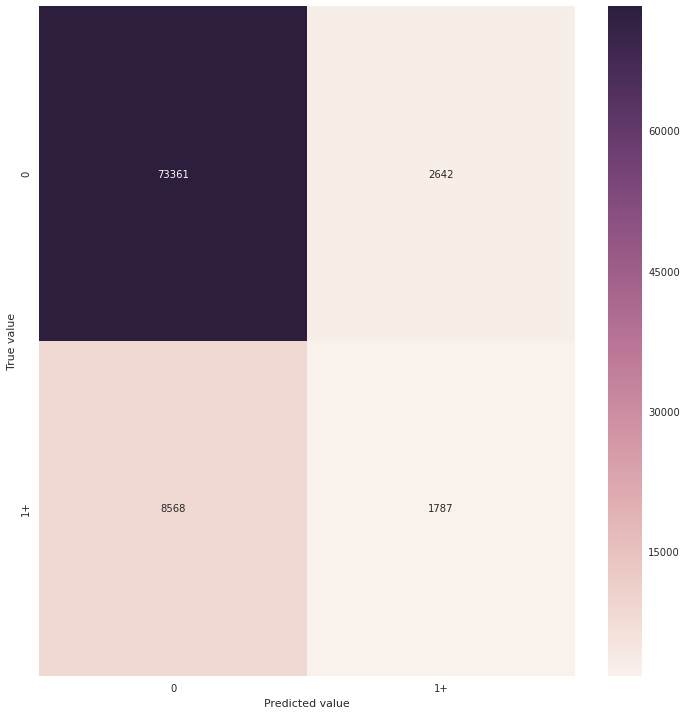

In [53]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['0', '1+'], yticklabels=['0', '1+'])
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.show()

In [40]:
if TYPE == "CLASSIFICATION":
    index_y = X_test[X_test['age_01-30'] == 1].index
    index_m = X_test[X_test['age_31-60'] == 1].index
    index_o = X_test[X_test['age_61-99'] == 1].index

    print 'Young: {} ; Middle: {} ; Old: {}'.format(len(index_y), len(index_m), len(index_o))

    y_test_y = y_test.loc[index_y]
    y_test_m = y_test.loc[index_m]
    y_test_o = y_test.loc[index_o]

    y_pred_y = np.take(y_pred, index_y)
    y_pred_m = np.take(y_pred, index_m)
    y_pred_o = np.take(y_pred, index_o)

    print "Accuracy Young: {:.2f}%".format(100*metrics.accuracy_score(y_test_y, y_pred_y))
    print "Accuracy Middle: {:.2f}%".format(100*metrics.accuracy_score(y_test_m, y_pred_m))
    print "Accuracy Old: {:.2f}%".format(100*metrics.accuracy_score(y_test_o, y_pred_o))

    fp_young = filter(lambda (real, pred): (real == 0) and (pred == 1), zip(y_test_y, y_pred_y))
    fp_middle = filter(lambda (real, pred): (real == 0) and (pred == 1), zip(y_test_m, y_pred_m))
    fp_old = filter(lambda (real, pred): (real == 0) and (pred == 1), zip(y_test_o, y_pred_o))

    fn_young = filter(lambda (real, pred): (real == 1) and (pred == 0), zip(y_test_y, y_pred_y))
    fn_middle = filter(lambda (real, pred): (real == 1) and (pred == 0), zip(y_test_m, y_pred_m))
    fn_old = filter(lambda (real, pred): (real == 1) and (pred == 0), zip(y_test_o, y_pred_o))

    print
    print 'Young FP: {}-{} ({:.2f}%)'.format(len(fp_young), len(index_y)-len(fp_young), (100.0*len(fp_young))/len(index_y))
    print 'Middle FP: {}-{} ({:.2f}%)'.format(len(fp_middle), len(index_m)-len(fp_middle), (100.0*len(fp_middle))/len(index_m))
    print 'Old FP: {}-{} ({:.2f}%)'.format(len(fp_old), len(index_o)-len(fp_old), (100.0*len(fp_old))/len(index_o))
    print
    print 'Young FN: {}-{} ({:.2f}%)'.format(len(fn_young), len(index_y)-len(fn_young), (100.0*len(fn_young))/len(index_y))
    print 'Middle FN: {}-{} ({:.2f}%)'.format(len(fn_middle), len(index_m)-len(fn_middle), (100.0*len(fn_middle))/len(index_m))
    print 'Old FN: {}-{} ({:.2f}%)'.format(len(fn_old), len(index_o)-len(fn_old), (100.0*len(fn_old))/len(index_o))

Young: 22354 ; Middle: 32393 ; Old: 31611
Accuracy Young: 89.42%
Accuracy Middle: 90.19%
Accuracy Old: 76.08%

Young FP: 495-21859 (2.21%)
Middle FP: 672-31721 (2.07%)
Old FP: 4154-27457 (13.14%)

Young FN: 1871-20483 (8.37%)
Middle FN: 2507-29886 (7.74%)
Old FN: 3406-28205 (10.77%)


In [41]:
if TYPE == "CLASSIFICATION":
    out_data = X_test.copy()

    ages = ['age_01-30', 'age_31-60', 'age_61-99']
    out_data['Age'] = map(lambda l: ages[l.index(1)], zip(out_data['age_01-30'], out_data['age_31-60'], out_data['age_61-99']))
    del out_data['age_01-30']
    del out_data['age_31-60']
    del out_data['age_61-99']

    genders = ['female', 'male']
    out_data['Gender'] = map(lambda l: genders[l.index(1)], zip(out_data['sexFEMALE'], out_data['sexMALE']))
    del out_data['sexFEMALE']
    del out_data['sexMALE']
    
    #print out_data.columns.tolist()
    out_data['Prediction'] = map(int, y_pred)
    out_data['Ground_Truth'] = map(int, y_test)

    out_data.to_csv('../../../data/medical/predictions_bin_4_25_2.csv', sep=',', index=False)

In [18]:
if TYPE == "CLASSIFICATION":
    temp = out_data.copy()
    temp['DaysInHospital'] = y_test
    temp['DaysInHospitalPred'] = y_pred

    tab = pd.crosstab(temp['DaysInHospital'], temp['Age'])
    print tab
    print
    tab = tab.values

    print 'Young in Hospital: {:.2f}%'.format((100.0*tab[1,0])/sum(tab[:,0]))
    print 'Middle in Hospital: {:.2f}%'.format((100.0*tab[1,1])/sum(tab[:,1]))
    print 'Old in Hospital: {:.2f}%'.format((100.0*tab[1,2])/sum(tab[:,2]))
    print

    tab = pd.crosstab(temp['DaysInHospitalPred'], temp['Age'])
    print tab
    print
    tab = tab.values

    print 'Young predicted in Hospital: {:.2f}%'.format((100.0*tab[1,0])/sum(tab[:,0]))
    print 'Middle predicted in Hospital: {:.2f}%'.format((100.0*tab[1,1])/sum(tab[:,1]))
    print 'Old predicted in Hospital: {:.2f}%'.format((100.0*tab[1,2])/sum(tab[:,2]))
    print

Age             age_01-30  age_31-60  age_61-99
DaysInHospital                                 
0                   20188      29571      26244
1                    2166       2822       5367

Young in Hospital: 9.69%
Middle in Hospital: 8.71%
Old in Hospital: 16.98%

Age                 age_01-30  age_31-60  age_61-99
DaysInHospitalPred                                 
0                       21541      31339      25628
1                         813       1054       5983

Young predicted in Hospital: 3.64%
Middle predicted in Hospital: 3.25%
Old predicted in Hospital: 18.93%



In [55]:
if TYPE == "REGRESSION":
    index_y = X_test[X_test['Age'] <= 30].index
    index_m = X_test[(X_test['Age'] > 30) & (X_test['Age'] <= 60)].index
    index_o = X_test[X_test['Age'] > 60].index
    
    print 'Young: {} ; Middle: {} ; Old: {}'.format(len(index_y), len(index_m), len(index_o))
    
    y_test_y = y_test.loc[index_y]
    y_test_m = y_test.loc[index_m]
    y_test_o = y_test.loc[index_o]
    
    y_pred_y = np.take(y_pred, index_y)
    y_pred_m = np.take(y_pred, index_m)
    y_pred_o = np.take(y_pred, index_o)
    
    
    print 'Average error Young: {:.2f}'.format(np.mean(abs(y_test_y-y_pred_y)))
    print 'Average error Middle: {:.2f}'.format(np.mean(abs(y_test_m-y_pred_m)))
    print 'Average error Old: {:.2f}'.format(np.mean(abs(y_test_o-y_pred_o)))

Young: 22354 ; Middle: 32393 ; Old: 31611
Average error Young: 0.09
Average error Middle: 0.09
Average error Old: 0.20


In [56]:
if TYPE == "REGRESSION":
    out_data = X_test.copy()

    genders = ['female', 'male']
    out_data['Gender'] = map(lambda l: genders[l.index(1)], zip(out_data['sexFEMALE'], out_data['sexMALE']))
    del out_data['sexFEMALE']
    del out_data['sexMALE']

    #print out_data.columns.tolist()
    out_data['Prediction'] = reg_y_pred
    out_data['Ground_Truth'] = reg_y_test
    
    out_data.to_csv('../../../data/medical/predictions_reg_log.csv', sep=',', index=False)